C:\Users\AUC\AppData\Local\Temp\ipykernel_13304\2656282503.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Greens")  # Color map for free cells


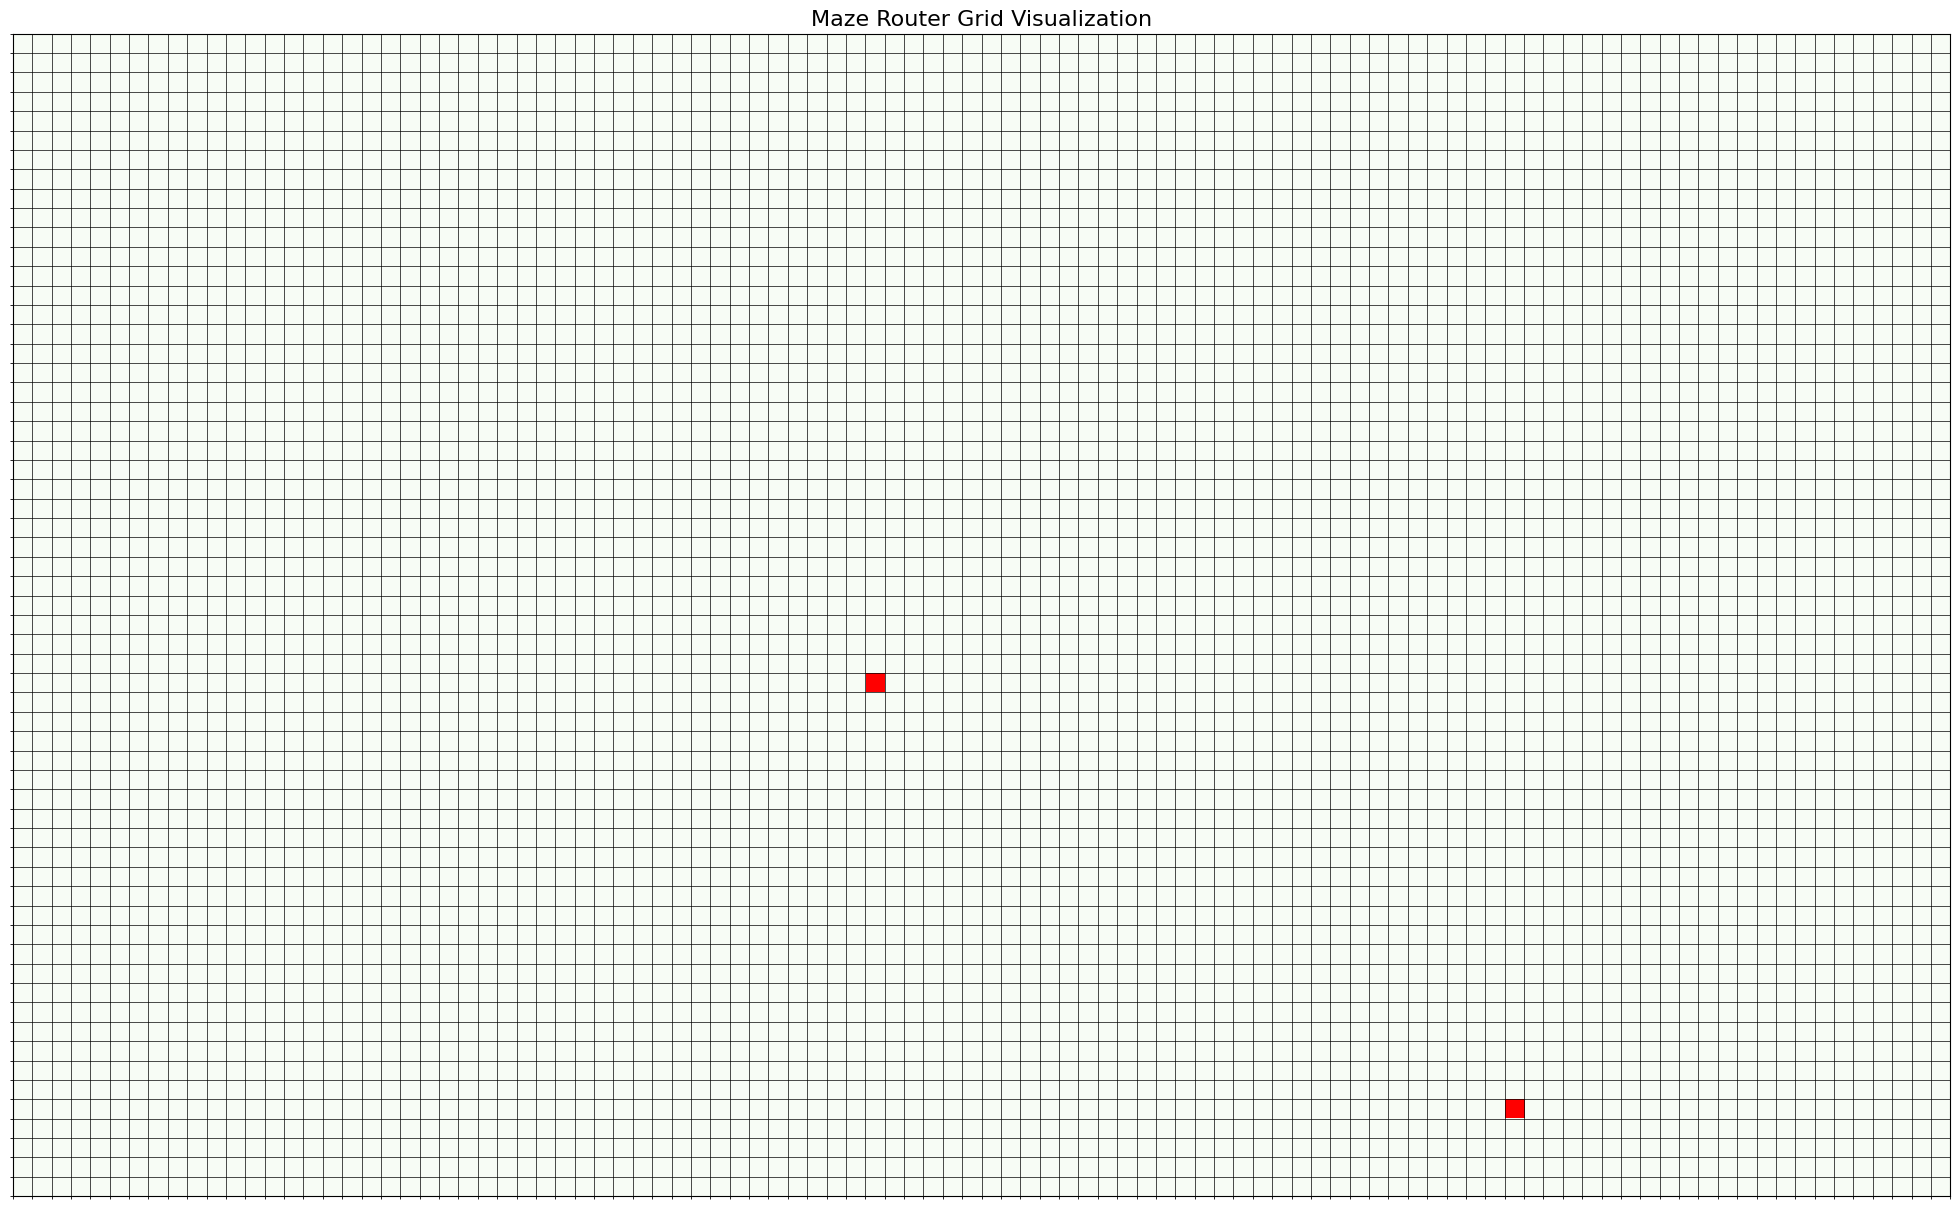

In [13]:
import re

# Global variables
grid_dimensions = None
bend_penalty = None
via_penalty = None
obstructions = []
nets = {}
grid = []


# Function to parse the input file
def parse_input_file(file_path):
    global grid_dimensions, bend_penalty, via_penalty, obstructions, nets

    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Parse the grid dimensions and penalties
    grid_info = list(map(int, lines[0].strip().split(',')))
    grid_dimensions = (grid_info[0], grid_info[1])  # NxM grid
    bend_penalty = grid_info[2]
    via_penalty = grid_info[3]

    # Parse the obstructions
    for line in lines[1:]:
        if line.startswith("OBS"):
            match = re.search(r"\((\d+),\s*(\d+),\s*(\d+)\)", line)
            if match:
                obstructions.append((int(match.group(1)), int(match.group(2)), int(match.group(3))))
    
    # Parse the nets
    for line in lines[1:]:
        if line.startswith("net"):
            net_name = line.split(' ')[0]
            net_points = re.findall(r"\((\d+),\s*(\d+),\s*(\d+)\)", line)
            nets[net_name] = [(int(layer), int(x), int(y)) for layer, x, y in net_points]

# Global grid representation

# Function to initialize the grid
def initialize_grid():
    global grid, grid_dimensions, obstructions

    # Extract dimensions
    rows, cols = grid_dimensions

    # Create a 2D list initialized with default cost (0 for simplicity)
    grid = [[{'cost': 0, 'obstruction': False} for _ in range(cols)] for _ in range(rows)]

    # Mark obstructions
    for layer, x, y in obstructions:
        # Use layer-1 indexing to represent each layer separately
        grid[x][y]['obstruction'] = True
        grid[x][y]['cost'] = float('inf')  # Assign a high cost to obstructions
import matplotlib.pyplot as plt
import numpy as np

def visualize_grid_matplotlib():
    global grid, grid_dimensions

    # Extract grid dimensions
    rows, cols = grid_dimensions

    # Create a numerical representation of the grid
    grid_matrix = np.zeros((rows, cols), dtype=int)
    for row in range(rows):
        for col in range(cols):
            if grid[row][col]['obstruction']:
                grid_matrix[row][col] = -1  # Mark obstructions

    # Create a heatmap-like visualization
    fig, ax = plt.subplots(figsize=(25, 25))  # Set a fixed figure size
    cmap = plt.cm.get_cmap("Greens")  # Color map for free cells
    cmap.set_under(color="red")  # Red for obstructions
    ax.imshow(grid_matrix, cmap=cmap, vmin=0, vmax=1)

    # Add grid lines
    ax.set_xticks(np.arange(-0.5, cols, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, rows, 1), minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=0.5)

    # Ensure the cells are square by setting aspect ratio to equal
    ax.set_aspect('equal')

    # Remove axes labels
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("Maze Router Grid Visualization", fontsize=16)

    # Show the plot
    plt.show()

# Test the Matplotlib visualization
if __name__ == "__main__":
    input_file = "input.txt"  # Replace with your input file path
    parse_input_file(input_file)  # Ensure the input file is parsed
    initialize_grid()  # Initialize the grid with dimensions and obstructions
    visualize_grid_matplotlib()  # Visualize the grid with equal cell sizes
